# Large Population: Neutral *vs* Selection

The parameters are summarized in the table below:

Parameter  | Neutral | Selection  |
-----------|---------|------------|
Final size | $10^8$  |   $10^8$   |
q (start)  |$10^{-3}$| $10^{-3}$  |
q-factor   | $1$   |   $1$    |  
P(death)   | $0.3$   |   $0.3$    |
Selection  | **0**   |  **0.3**   |  

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from ThesisScripts.MyModel import *
from ThesisScripts.Analyses import *
from ThesisScripts.Visualizations import *
from ThesisScripts.PhyloTree import *

from IPython.display import Image

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

#matplotlib preamble, taken from http://blog.juliusschulz.de/blog/ultimate-ipython-notebook
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 75

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 14, 7
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

In [2]:
%ls Figures/

Large-HIGH_DEATH-Neutral_vs_Selection-SAMPLED/
Large-HIGH_MUTRATE-Neutral_vs_Selection-SAMPLED/
Large-MUTATOR-Neutral_vs_Selection-SAMPLED/
Large-Neutral_vs_Selection-SAMPLED/


# Simulations

## Neutral

In [3]:
# set seed to get same result for each test simulation
np.random.seed(123)

l = 10**8      # size limit
q = 10**(-3)   # mutation rate
qfac = 1       # mutation-rate increasing factor (here: no Mutator phenotype)
alpha = 0.3    # death rate
sel = 0        # selection factor
large_N = Population(l, q, mutfactor=qfac, death_frac=alpha, selection=sel)
large_N.simulate()
print("Total population size:", large_N.size)
print("Generations:", large_N.gen)
print()
print("Start clone size:", large_N.start_clone.size)
print("Number of subclones:", len(large_N.clones[1:]))

Total population size: 116402657
Generations: 35

Start clone size: 114956110
Number of subclones: 166236


## In case of selection

In [4]:
# set seed to get same result for each test simulation
np.random.seed(123)

l = 10**8      # size limit
q = 10**(-3)   # mutation rate
qfac = 1       # mutation-rate increasing factor (here: no Mutator phenotype)
alpha = 0.3    # death rate
sel = 0.3      # selection factor
large_S = Population(l, q, mutfactor=qfac, death_frac=alpha, selection=sel)
large_S.simulate()
print("Total population size:", large_S.size)
print("Generations:", large_S.gen)
print()
print("Start clone size:", large_S.start_clone.size)
print("Number of subclones:", len(large_S.clones[1:]))

Total population size: 116402657
Generations: 35

Start clone size: 2159346
Number of subclones: 165726


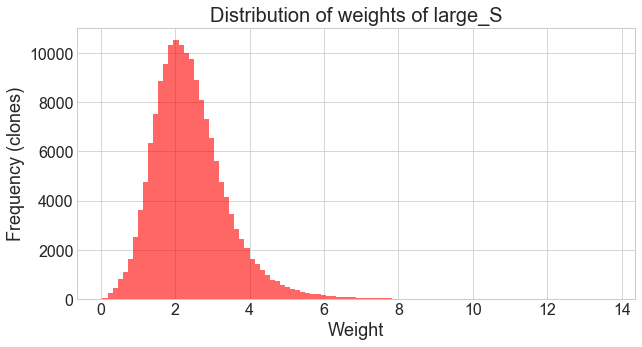

In [5]:
# Check weights of clones for population with selection
weights = []
for clone in large_S.clones:
    weights.append(clone.weight)

plt.figure(figsize=(10,5))
plt.hist(weights, bins=100, color='r', alpha=0.6)
plt.title("Distribution of weights of large_S")
plt.xlabel("Weight")
plt.ylabel("Frequency (clones)")
plt.show()

## SAMPLED DATA

In [6]:
sample_size = 10**6
detection_limit = 100

In [7]:
%%time
large_N_data = final_data(large_N)
large_S_data = final_data(large_S)

large_N_data = sample(large_N_data, sample_size, detection_limit)
large_S_data = sample(large_S_data, sample_size, detection_limit)

CPU times: user 8.33 s, sys: 168 ms, total: 8.5 s
Wall time: 9.9 s


In [8]:
large_N_data.head()

,Birthday,q,Final size,Family size,Allele frequency,Mutations,Children,Weight,RGB color,sampled_size,sampled_fam_size,sampled_AF
Clone ID,,,,,,,,,,,,
A,0,0.001,114956110,116402657,1.000000,0,164368,1,"(0, 0, 0)",992273,1000000,1.000000
A.1,15,0.001,156548,157277,0.001351,1,225,1,"(198, 141, 156)",1329,1329,0.001329
A.2,15,0.001,65209,65862,0.000566,1,92,1,"(108, 63, 84)",546,547,0.000547
A.4,17,0.001,7082,7145,0.000061,1,9,1,"(248, 203, 138)",64,64,0.000064
A.6,17,0.001,7895,8012,0.000069,1,12,1,"(186, 187, 151)",63,63,0.000063


In [9]:
large_S_data.head()

,Birthday,q,Final size,Family size,Allele frequency,Mutations,Children,Weight,RGB color,sampled_size,sampled_fam_size,sampled_AF
Clone ID,,,,,,,,,,,,
A,0,0.001,2159346,116402657,1.000000,0,5666,1.000000,"(0, 0, 0)",18741,1000000,1.000000
A.1,14,0.001,105773055,113841935,0.978001,1,149747,2.370028,"(156, 108, 63)",912669,977902,0.977902
A.3,17,0.001,11487,11638,0.000100,1,19,1.526581,"(187, 151, 25)",109,109,0.000109
A.4,17,0.001,154,154,0.000001,1,0,0.832286,"(176, 56, 215)",2,2,0.000002
A.7,17,0.001,2682,2686,0.000023,1,8,1.347454,"(28, 66, 10)",18,18,0.000018


## Evolution of clone family sizes

### Large Neutral

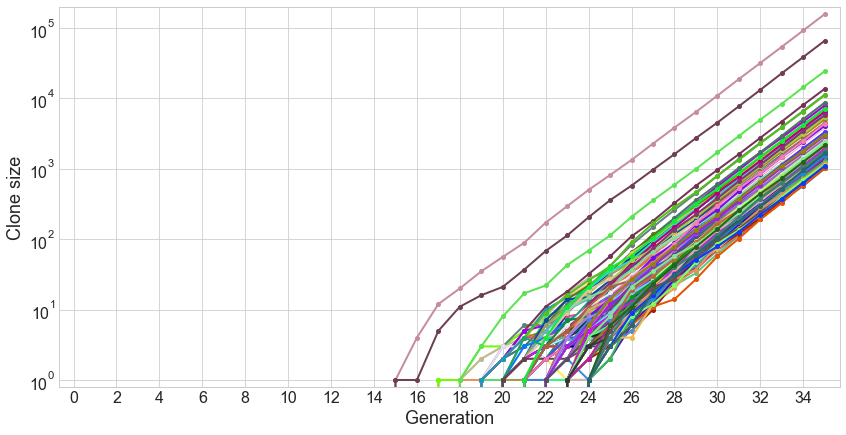

In [4]:
large_N_fam_size_plot = family_size_plots(large_N, det_lim=1000);
#plt.title("Clone family sizes for large_N Population");
plt.xticks(range(0, large_N.gen+1, 2));
#plt.legend();
plt.margins(0.02);
plt.ylabel('Clone size');
plt.savefig("./Figures/Large-Neutral_vs_Selection-SAMPLED/large_N-fam_size_evo.png", bbox_inches='tight');
plt.show()

### Large Selection

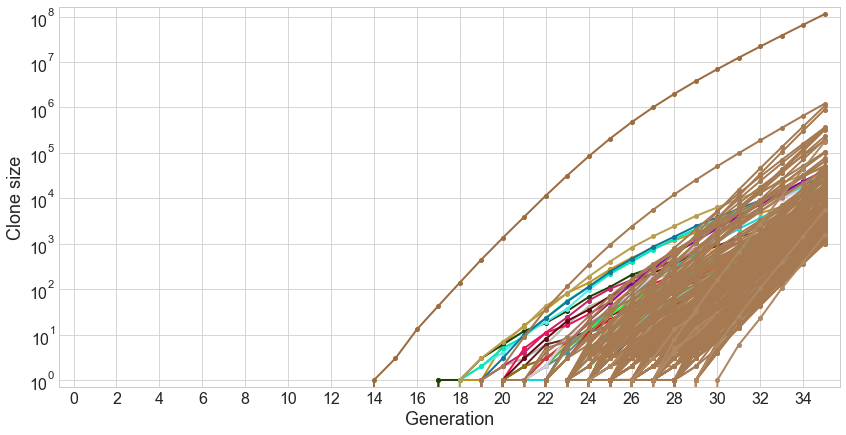

In [13]:
large_S_fam_size_plot = family_size_plots(large_S, det_lim=1000);
#plt.title("Clone family sizes for large_S");
plt.xticks(range(0, large_S.gen+1, 2));
plt.margins(0.02);
#plt.legend();
plt.ylabel('Clone size');
plt.savefig("./Figures/Large-Neutral_vs_Selection-SAMPLED/large_S-fam_size_evo.png", bbox_inches='tight');
plt.show()

## Phylo tree for Neutral Population

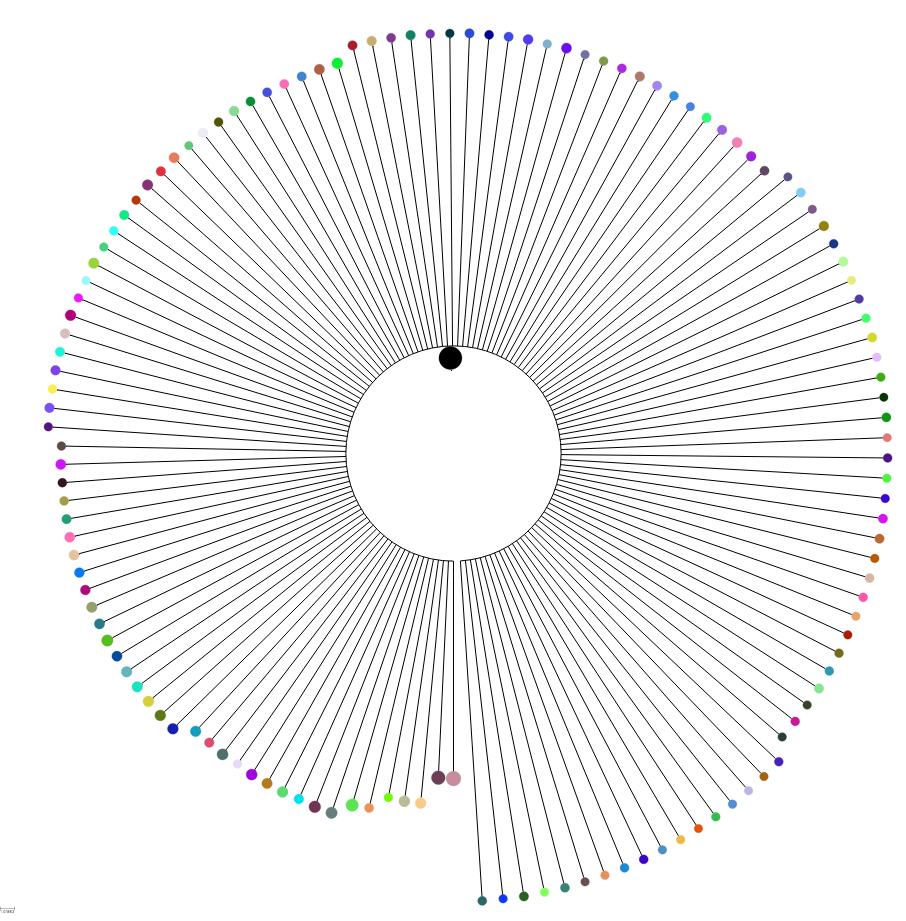

In [5]:
large_N_tree, large_N_ts = build_tree(large_N, det_lim=1000, log=True)
#print(large_N_tree)
large_N_ts.mode = 'c'
large_N_tree.render("./Figures/Large-Neutral_vs_Selection-SAMPLED/large_N-tree.png", tree_style=large_N_ts, h=260, units='mm');
Image("./Figures/Large-Neutral_vs_Selection-SAMPLED/large_N-tree.png")

## Phylo tree for Population with Selection

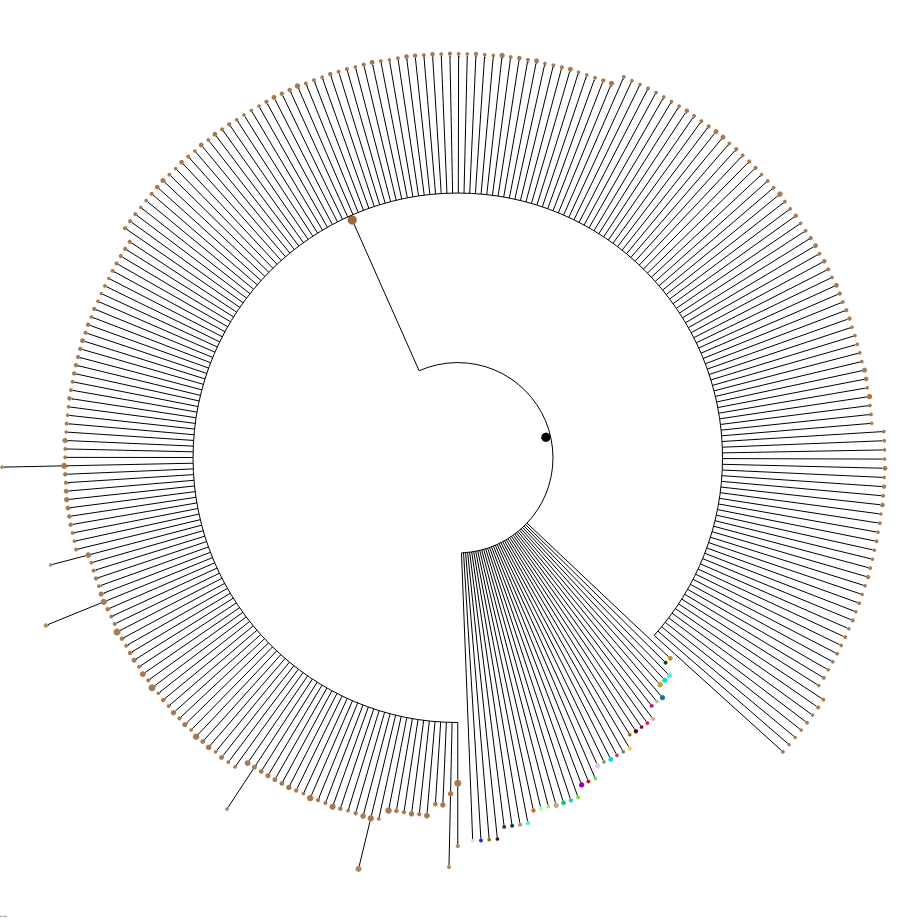

In [15]:
large_S_tree, large_S_ts = build_tree(large_S, det_lim=1000, log=True)
#print(large_S_tree)
large_S_ts.mode = 'c'
large_S_tree.render("./Figures/Large-Neutral_vs_Selection-SAMPLED/large_S-tree.png", tree_style=large_S_ts, h=260, units='mm');
Image("./Figures/Large-Neutral_vs_Selection-SAMPLED/large_S-tree.png")

## Allele frequency spectrum for Neutral Population

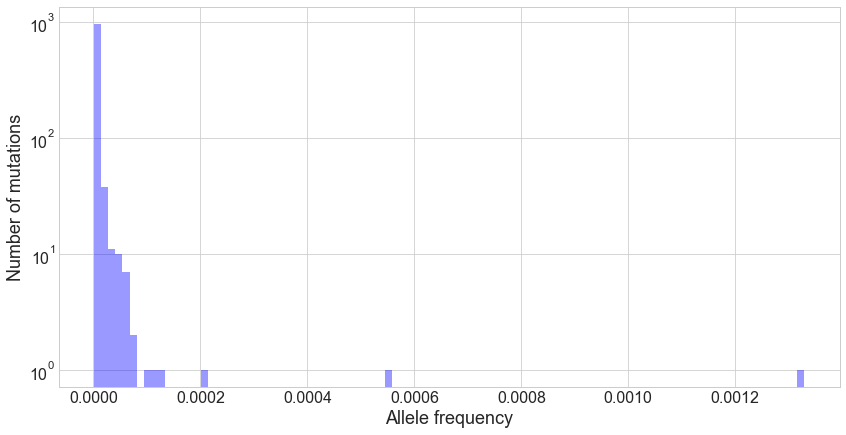

In [16]:
large_N_af = large_N_data["sampled_AF"]
sns.distplot(large_N_af.iloc[1:], kde=False, norm_hist=False, bins=100, color='b')
plt.ylabel('Number of mutations');
plt.xlabel('Allele frequency');
#plt.title('Allele frequency spectrum for large_N Population');
plt.yscale('log');
plt.savefig("./Figures/Large-Neutral_vs_Selection-SAMPLED/SAMPLED-large_N-AF_spec.png", bbox_inches='tight');
plt.show()

## Allele frequency spectrum for Population with Selection

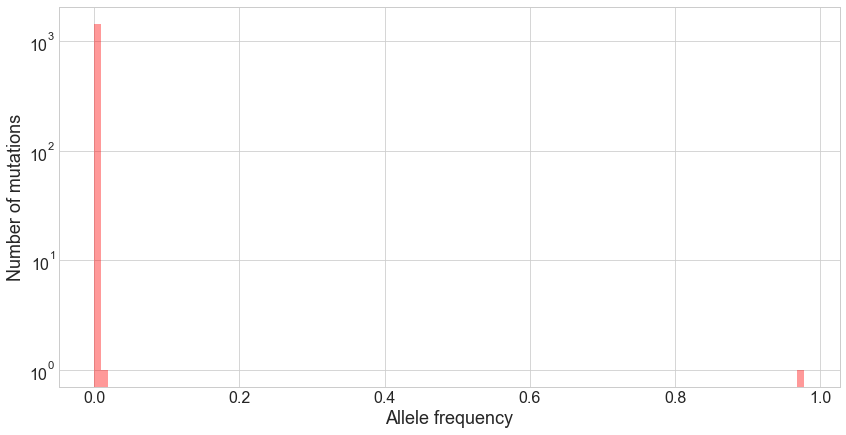

In [17]:
large_S_af = large_S_data["sampled_AF"]
sns.distplot(large_S_af.iloc[1:], kde=False, norm_hist=False, bins=100, color='r')
plt.ylabel('Number of mutations');
plt.xlabel('Allele frequency');
#plt.title('Sampled Allele frequency spectrum for large_S Population');
plt.yscale('log');
plt.savefig("./Figures/Large-Neutral_vs_Selection-SAMPLED/SAMPLED-large_S-AF_spec.png", bbox_inches='tight');
plt.show()

## Cumulative number of mutations in function of inverse allele frequency


R^2 = 0.9842998377246458


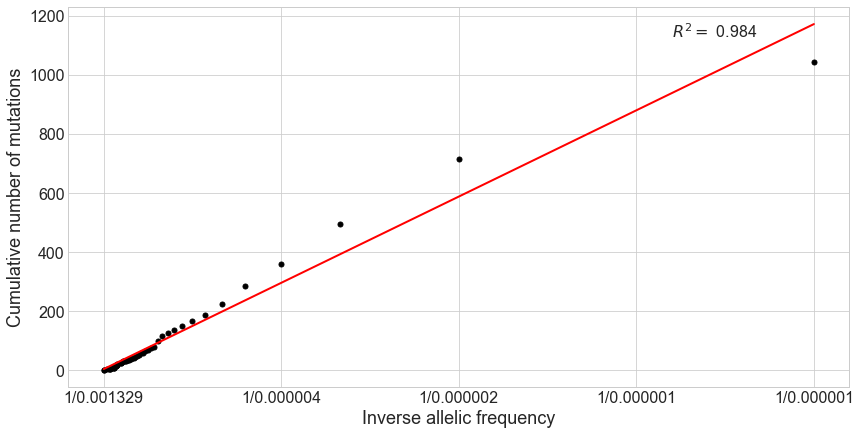


R^2 = 0.9612113044913704


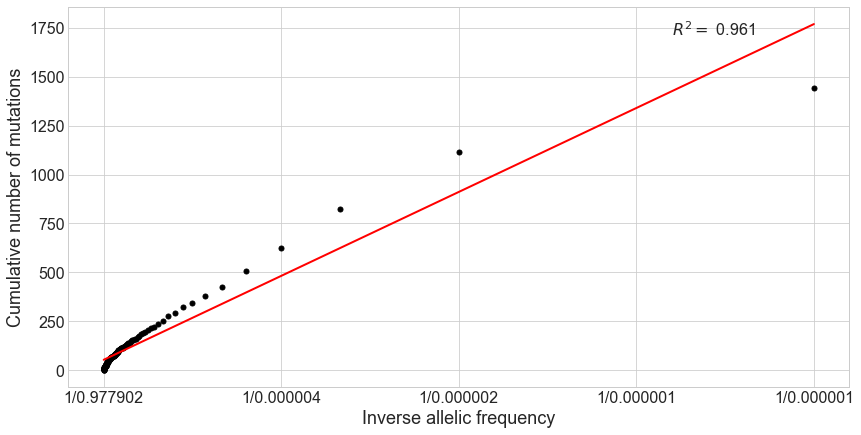

In [18]:
fit_large_N_af_r_value = fit_cumulative_mutations(large_N_data, sampled=True, plot=True)
print("\nR^2 =", fit_large_N_af_r_value)
#plt.title("Cumulative number of mutations for large_N population");
plt.savefig("./Figures/Large-Neutral_vs_Selection-SAMPLED/SAMPLED-large_N-Cum_num_M.png");
plt.show()

fit_large_S_af_r_value = fit_cumulative_mutations(large_S_data, sampled=True, plot=True)
print("\nR^2 =", fit_large_S_af_r_value)
#plt.title("Cumulative number of mutations for large_S population");
plt.savefig("./Figures/Large-Neutral_vs_Selection-SAMPLED/SAMPLED-large_S-Cum_num_M.png", bbox_inches='tight');
plt.show()

## Heterogeneity

0.9622453852576156 0.1346038820392217


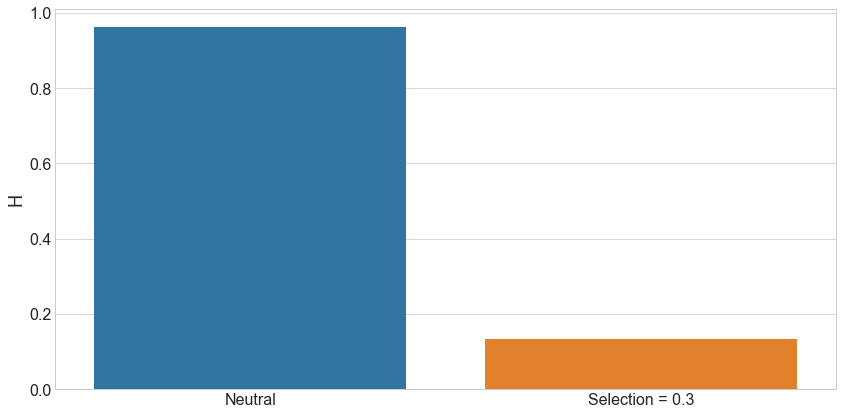

In [19]:
large_N_H = heterogeneity(large_N_data, sampled=True)
large_S_H = heterogeneity(large_S_data, sampled=True)
print(large_N_H, large_S_H)
sns.barplot(x=[0, 1], y=[large_N_H, large_S_H]);
plt.xticks([0,1], ["Neutral", "Selection = 0.3"]);
plt.ylabel("H");
#plt.title("Comparison of Heterogeneity");
plt.savefig("./Figures/Large-Neutral_vs_Selection-SAMPLED/SAMPLED-Neutral_vs_Sel-Heterogeneity.png", bbox_inches='tight')
plt.show()

## Distribution of number of mutations

             Neutral, mean = 1.002  Selection = 0.3, mean = 1.068
# mutations                                                      
1                           7708.0                         916020
2                             19.0                          63472
3                              NaN                           1753
4                              NaN                              6


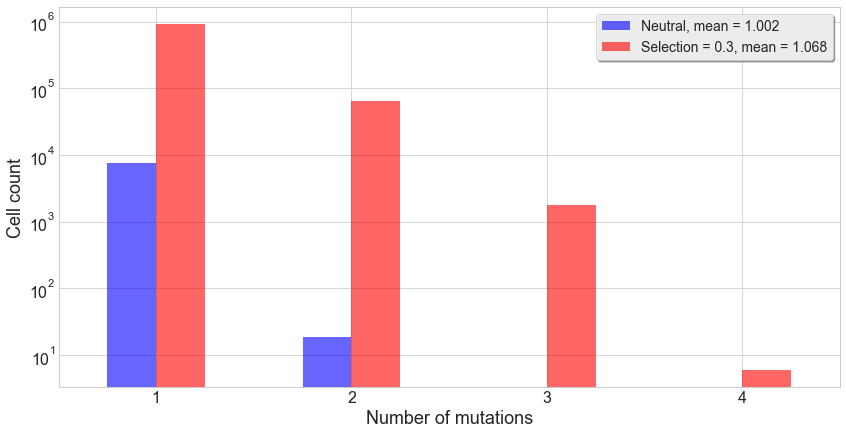

In [20]:
large_N_num_mut_df = num_mutations_distribution(large_N_data, sampled=True, det_lim=detection_limit)
large_N_avg_num_mut = avg_num_mutations(large_N_num_mut_df)
large_N_num_mut_df.columns = ["Neutral, mean = %s" %(round(large_N_avg_num_mut, 3))]
#large_N_num_mut_df.plot(kind='bar', logy=True, legend=True, rot=0, color='b', alpha=0.6);

large_S_num_mut_df = num_mutations_distribution(large_S_data, sampled=True, det_lim=detection_limit)
large_S_avg_num_mut = avg_num_mutations(large_S_num_mut_df)
large_S_num_mut_df.columns = ["Selection = %s, mean = %s" %(sel, round(large_S_avg_num_mut, 3))]
#large_S_num_mut_df.plot(kind='bar', logy=True, legend=True, rot=0, color='r', alpha=0.6);

combo = large_N_num_mut_df.join(large_S_num_mut_df, how='right')
print(combo)
combo.plot(kind='bar', logy=True, legend=True, rot=0, color=['b', 'r'], alpha=0.6);

plt.ylabel("Cell count");
plt.xlabel("Number of mutations");
#plt.title("Number of mutations distribution");
plt.legend(frameon=True, fancybox=True, shadow=True);
plt.savefig("./Figures/Large-Neutral_vs_Selection-SAMPLED/SAMPLED-Neutral_vs_Sel-Num_mut.png", bbox_inches='tight')
plt.show()

## Reconstructing the mutational timeline

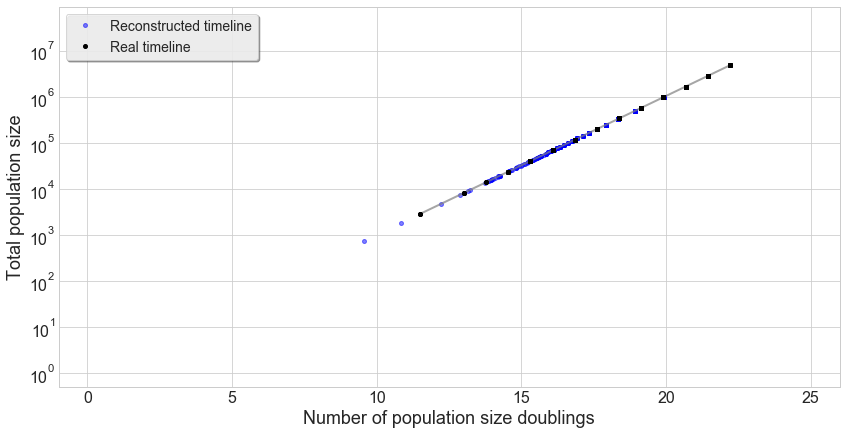

In [21]:
alpha_N = large_N.death_frac

large_N_mutations = large_N_data.loc[large_N_data['Family size'] >= 1].iloc[1:]
large_N_real_t = large_N_mutations["Birthday"].values
large_N_real_T = large_N_real_t*np.log(2-alpha_N)/np.log(2)
large_N_real_popsizes = list(large_N.size_vec[i] for i in large_N_real_t)

large_N_rec_T, large_N_rec_popsizes, large_N_rec_errors = reconstruct_mutational_timeline(large_N_data, alpha_N, sampled=True, det_lim=detection_limit)

plt.plot(large_N_rec_T, large_N_rec_popsizes, marker='.', color='b', alpha=0.5, linestyle='none', label='Reconstructed timeline');
plt.plot(large_N_real_T, large_N_real_popsizes, color='gray', alpha=0.7);
plt.plot(large_N_real_T, large_N_real_popsizes, marker='.', color='k', linestyle='none', label='Real timeline');

plt.xlabel('Number of population size doublings');
plt.ylabel('Total population size');
#plt.title('Mutational events for large_N population (in dimensionless time)');
plt.legend(loc='upper left', frameon=True, fancybox=True, shadow=True);
plt.yscale('log');
plt.xlim(-1, 26);
plt.ylim(0.5, 9*10**7);
plt.savefig("./Figures/Large-Neutral_vs_Selection-SAMPLED/SAMPLED-large_N-Rec_mut_timeline.png", bbox_inches='tight');
plt.show()

In [22]:
round(np.median(large_N_rec_errors), 2)

1.03

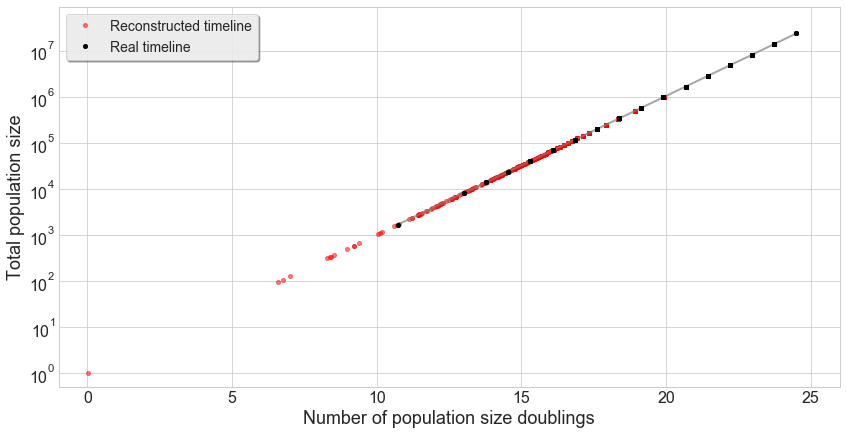

In [23]:
alpha_S = large_S.death_frac

large_S_mutations = large_S_data.loc[large_S_data['Family size'] >= 1].iloc[1:]
large_S_real_t = large_S_mutations["Birthday"].values
large_S_real_T = large_S_real_t*np.log(2-alpha_S)/np.log(2)
large_S_real_popsizes = list(large_S.size_vec[i] for i in large_S_real_t)

large_S_rec_T, large_S_rec_popsizes, large_S_rec_errors = reconstruct_mutational_timeline(large_S_data, alpha_S, sampled=True, det_lim=detection_limit)

plt.plot(large_S_rec_T, large_S_rec_popsizes, marker='.', color='r', alpha=0.5, linestyle='none', label='Reconstructed timeline');
plt.plot(large_S_real_T, large_S_real_popsizes, color='gray', alpha=0.7);
plt.plot(large_S_real_T, large_S_real_popsizes, marker='.', color='k', linestyle='none', label='Real timeline');

plt.xlabel('Number of population size doublings');
plt.ylabel('Total population size');
#plt.title('Mutational events for large_S population (in dimensionless time)');
plt.legend(loc='upper left', frameon=True, fancybox=True, shadow=True);
plt.yscale('log');
plt.xlim(-1, 26);
plt.ylim(0.5, 9*10**7);
plt.savefig("./Figures/Large-Neutral_vs_Selection-SAMPLED/SAMPLED-large_S-Rec_mut_timeline.png", bbox_inches='tight');
plt.show()

In [24]:
round(np.median(large_S_rec_errors), 2)

3.09